In [2]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

In this notebook we are going to discuss how to solve for the groundstate energy of the Deuteron, the simplest many body quantum problem in nuclear structure physics. 

We are going to do so in two different basises: The Harmonic Oscillator and the momentum basis. We will then compare these two approaches. 

Let us start with the Harmonic Oscillator. We create a function which returns the eigenvalues we look for when entering the data. 

 

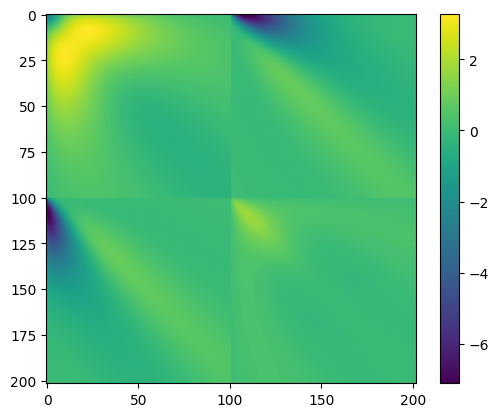

H_20 vs. H_02^T:
True


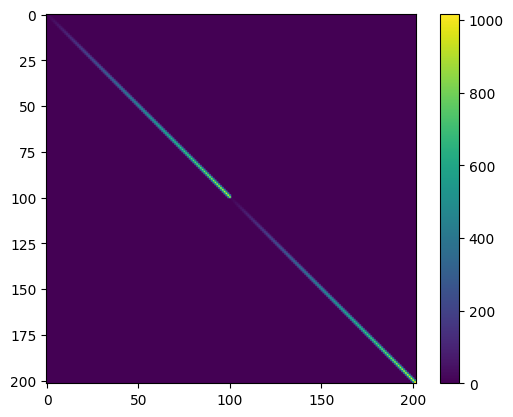

[-2.22299704  0.14697385  0.40414846  0.58260612  1.00660602  1.29587173
  1.84849901  2.27673081  2.93140188  3.51882127]
[1588.00388147 1607.74456852 1650.48399632 1670.26732418 1718.62869092
 1739.4763886  1798.93615549 1819.40194099 1895.0952472  1919.17419112]
1


In [23]:
def symmetrize(m):
    return m + m.T - np.diag(m.diagonal())

def hermitize(m01, m10):
    return m01 + m10.T - np.diag(m01.diagonal())

def create_hamiltonian(file1, file2, plotting = None):
    vNN = pd.read_csv(file1, sep = r"\s+", header = None, skiprows = 1)
    tRel = pd.read_csv(file2, sep = r"\s+", header = None, skiprows = 1)

    vNN = vNN.rename(columns = {0: "N", 1: "L", 2: "NN", 3:"LL", 4:"S", 5:"J", 6: "T", 7:"MT", 8:"E"})
    tRel = tRel.rename(columns = {0: "N", 1: "L", 2: "NN", 3:"LL", 4:"S", 5:"J", 6: "T", 7:"MT", 8:"E"})

    vNN = vNN.loc[(vNN['J'] == 1) & (vNN['S'] == 1) & (vNN['T'] == 0) & (vNN['MT'] == 0)]
    tRel = tRel.loc[(tRel['J'] == 1) & (tRel['S'] == 1) & (tRel['T'] == 0) & (tRel['MT'] == 0)]

    vNN = vNN.sort_values(['L',"LL"])
    tRel = tRel.sort_values(['L',"LL"])

    V_00 = vNN[(vNN['L'] == 0) & (vNN["LL"] == 0)].pivot(index="N", columns="NN", values='E').fillna(0).values
    V_02_wip = vNN[(vNN['L'] == 0) & (vNN["LL"] == 2)].pivot(index="N", columns="NN", values='E').fillna(0).values
    V_20_wip = vNN[(vNN['L'] == 2) & (vNN["LL"] == 0)].pivot(index="N", columns="NN", values='E').fillna(0).values
    V_22 = vNN[(vNN['L'] == 2) & (vNN["LL"] == 2)].pivot(index="N", columns="NN", values='E').fillna(0).values

    V_00 = symmetrize(V_00)
    V_02 = hermitize(V_02_wip, V_20_wip)
    V_20 = hermitize(V_20_wip, V_02_wip)
    V_22 = symmetrize(V_22)

    V = np.block([[V_00, V_02], [V_20, V_22]])

    T_00 = tRel[(tRel['L'] == 0) & (tRel["LL"] == 0)].pivot(index="N", columns="NN", values='E').fillna(0).values
    T_02 = tRel[(tRel['L'] == 0) & (tRel["LL"] == 2)].pivot(index="N", columns="NN", values='E').fillna(0).values
    T_20 = tRel[(tRel['L'] == 2) & (tRel["LL"] == 0)].pivot(index="N", columns="NN", values='E').fillna(0).values
    T_22 = tRel[(tRel['L'] == 2) & (tRel["LL"] == 2)].pivot(index="N", columns="NN", values='E').fillna(0).values

    T_00 = symmetrize(T_00)
    #T_02 = hermitize(T_02, T_20)
    #T_20 = hermitize(T_20, T_02)
    T_22 = symmetrize(T_22)

    T = np.block([[T_00, T_02], [T_20, T_22]])

    if plotting:
        plt.imshow(V)
        plt.colorbar()
        plt.show()
        
        # Validate symmetry of submatrices
        print("H_20 vs. H_02^T:")
        print(np.allclose(V_20, V_02.T))

        plt.imshow(T)
        plt.colorbar()
        plt.show()
    return V+T

def solve_eigensystem(m):
    w, v = np.linalg.eig(m)
    return w, v


if __name__ == "__main__":
    vNN_dat = r"Data\RelativeHarmonicOscillator\chi2bSMSI5C\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO010.meho\chi2bSMSI5C_srg0000_NMax100_LMax02_hwHO010.meho"
    tRel_dat = r"Data\RelativeHarmonicOscillator\kinetic\trel_NMax100_LMax02_hwHO010.meho\trel_NMax100_LMax02_hwHO010.meho"
    H = create_hamiltonian(vNN_dat, tRel_dat, plotting = True)
    w, v = solve_eigensystem(H)
    # sort w and print smallest eigenvalues
    w_sorted = np.sort(w)
    print(w_sorted[:10])
    print(w_sorted[-10:])

    # check negative eigenvalues
    print(np.sum(w_sorted < 0))

    


    